# Proyecto 2 y 3 - Introduccion a la ciencia de datos
* Alejandro Marin Hoyos
* Manuel Antonio Vidales
* Yessica Fernanda Villa  
### 2. Limpieza y Normalización de Datos

In [9]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------  11.0/11.1 MB 86.0 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 43.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/40.9 MB ? eta -:--:--
   ------------------ --------------------- 19.1/40.9 MB 93.0 MB/s eta 0:00:01
   ---------------------------------------  40.9/40.9 MB 104.2 MB/s eta 0:00:01
   ---------------------------------------- 40.9/40.9 MB 79.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Importacion de librerias necesarias

In [10]:
# Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
print(plt.style.available)


plt.style.use('seaborn-v0_8')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Se carga el dataset

In [11]:
# Cargar datos
avocado = pd.read_csv('../data/avocado.csv')

### 1. Manejo de valores nulos

**Aunque este dataset no contiene valores nulos, a continuación se describe el protocolo a seguir en caso de que se presenten:**

- **Para variables numéricas:**
  - Se recomienda imputar los valores faltantes con la **mediana**, ya que es menos sensible a los valores atípicos, o con la **media** si se considera adecuado.

- **Para variables categóricas:**
  - En este caso, se sugiere imputar los valores faltantes con la **moda** o bien asignarles el valor **"Desconocido"** para evitar que los datos incompletos afecten el análisis.

In [13]:
# Verificamos si hay valores nulos en el dataset
null_counts = avocado.isnull().sum()
null_percentage = (avocado.isnull().mean() * 100).round(2)

pd.DataFrame({
    'Valores Nulos': null_counts,
    'Porcentaje (%)': null_percentage
}).sort_values(by='Porcentaje (%)', ascending=False)

,Valores Nulos,Porcentaje (%)
Unnamed: 0,0,0.0
Date,0,0.0
AveragePrice,0,0.0
Total Volume,0,0.0
4046,0,0.0
4225,0,0.0
4770,0,0.0
Total Bags,0,0.0
Small Bags,0,0.0
Large Bags,0,0.0


### Tratamiento de Valores Atípicos
### Identificación con IQR

Se utilizó el **método del Rango Intercuartílico (IQR)** para identificar los **valores atípicos** en la columna **"Total Volume"** del conjunto de datos de aguacates. El proceso consistió en:

1. Calcular los **cuartiles** (Q1 y Q3) y el **Rango Intercuartílico (IQR)**.
2. Establecer los **límites inferior y superior** para detectar los valores fuera de estos rangos.
3. Filtrar los datos para identificar los registros que superan los límites establecidos.

El número total de **valores atípicos** encontrados en la columna "Total Volume" fue determinado, proporcionando información clave para el análisis y tratamiento de los outliers en el conjunto de datos.

In [15]:
def detectar_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]
outliers = detectar_outliers(avocado, 'Total Volume')
print(f"Número de outliers en 'Total Volume': {len(outliers)}")


Número de outliers en 'Total Volume': 2297


### Estrategias para el Tratamiento de Valores Atípicos

- **Transformación logarítmica:** Es adecuada para datos que siguen una distribución exponencial, ya que mantiene el orden de los datos sin eliminar valores extremos.
- **Winsorization:** Es útil cuando se desea mantener los valores originales, pero limitando los valores atípicos a un rango aceptable.

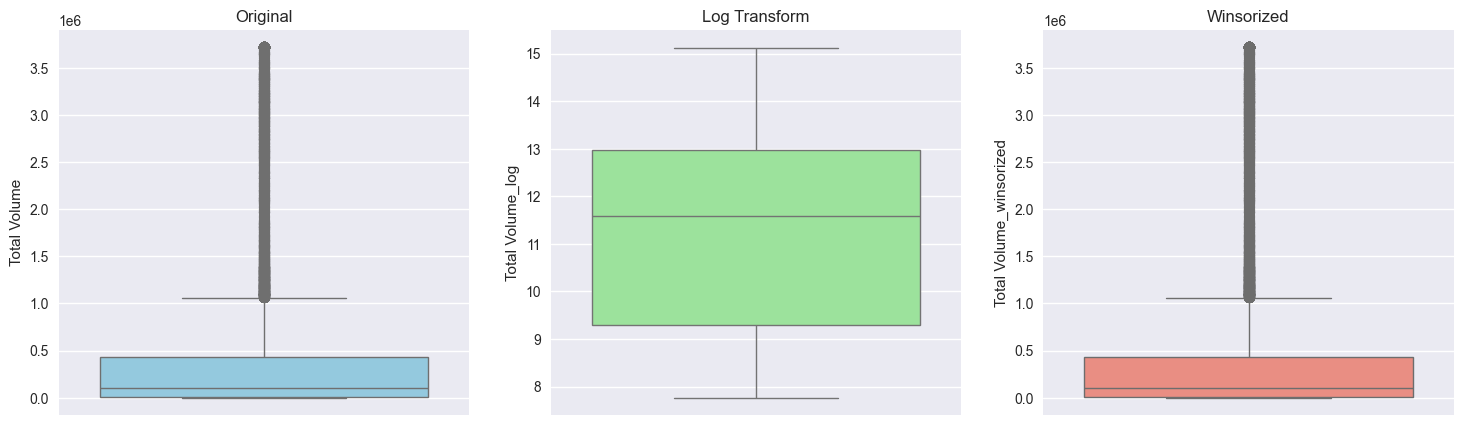

In [ ]:
# Opción 1: Transformación logarítmica
avocado['Total Volume_log'] = np.log1p(avocado['Total Volume'])

# Opción 2: Winsorization
from scipy.stats.mstats import winsorize
avocado['Total Volume_winsorized'] = winsorize(avocado['Total Volume'], limits=[0.05, 0.05])

# Comparación visual
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(y=avocado['Total Volume'], ax=axes[0], color='skyblue').set_title('Original')
sns.boxplot(y=avocado['Total Volume_log'], ax=axes[1], color='lightgreen').set_title('Log Transform')
sns.boxplot(y=avocado['Total Volume_winsorized'], ax=axes[2], color='salmon').set_title('Winsorized')

plt.show()


## 3. Transformación de variables categóricas
### Convertir 'type' a dummy

In [19]:
avocado = pd.get_dummies(avocado, columns=['type'], drop_first=True)

### Convertir fecha a características numéricas

In [20]:
avocado['Date'] = pd.to_datetime(avocado['Date'])
avocado['month'] = avocado['Date'].dt.month
avocado['day_of_week'] = avocado['Date'].dt.dayofweek
avocado.drop('Date', axis=1, inplace=True)

### Codificación one-hot para region (simplificada)
Se agruparon las regiones menos frecuentes bajo la categoría 'Other' y se aplicó codificación one-hot a la columna 'region', eliminando la primera columna para evitar multicolinealidad. Esto simplifica la variable para su uso en modelos de machine learning.

In [21]:
top_regions = avocado['region'].value_counts().nlargest(10).index
avocado['region'] = avocado['region'].apply(lambda x: x if x in top_regions else 'Other')
avocado = pd.get_dummies(avocado, columns=['region'], drop_first=True)

###  Normalización

Se aplicó **normalización** a las columnas numéricas del conjunto de datos que representan volúmenes y cantidades de aguacates, utilizando el **StandardScaler** de scikit-learn. Las columnas normalizadas incluyen **'Total Volume'**, **'4046'**, **'4225'**, **'4770'**, **'Total Bags'**, **'Small Bags'**, **'Large Bags'**, y **'XLarge Bags'**.

La normalización fue realizada con el método **StandardScaler**, que ajusta los datos para que tengan una media de 0 y una desviación estándar de 1, lo que facilita su uso en modelos de machine learning al evitar que las variables con mayores escalas dominen el aprendizaje.

Este proceso mejora la eficiencia y precisión de los modelos al asegurar que todas las variables estén en una escala comparable.


In [22]:
cols_to_scale = ['Total Volume', '4046', '4225', '4770', 
                'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

scaler = StandardScaler()
avocado[cols_to_scale] = scaler.fit_transform(avocado[cols_to_scale])

## Guardar datos limpios

In [23]:
avocado.to_csv('../data/avocado_clean.csv', index=False)
print("Datos limpios guardados exitosamente en 'avocado_clean.csv'.")

Datos limpios guardados exitosamente en 'avocado_clean.csv'.
